In [6]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

In [7]:
with open('primitive_length.pkl', 'rb') as f:
    L = pickle.load(f)
f.close()

with open('noise_switch_frequency.pkl', 'rb') as f:
    switch_list = pickle.load(f)
f.close()
print(L)
print(switch_list)

[ 1  3  5  7  9 11 13 15 17 19 20 30 40 50 60 70 80 90]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0]


F_Ciff = 1 - r =  0.9803946444051971
A =  0.6555485236934202


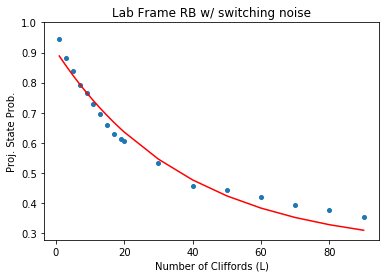

[0.94422836 0.88277561 0.83995339 0.79083536 0.76469017 0.72755981
 0.69606339 0.65794479 0.6298556  0.61338722 0.60594793 0.5344841
 0.45843001 0.44371338 0.4196963  0.39382851 0.37904635 0.35462245]
[0.6942283585833954, 0.632775605546784, 0.589953391031732, 0.5408353574981913, 0.5146901723201488, 0.4775598109301703, 0.4460633922558014, 0.40794478690552505, 0.3798556025887788, 0.36338721864226364, 0.35594792967290434, 0.28448410023630655, 0.20843000690431845, 0.19371338398138155, 0.16969629545126202, 0.1438285076934917, 0.12904635192845082, 0.10462245289539013]
F_Ciff = 1 - r =  0.983152298531575
A =  0.6119178200601408


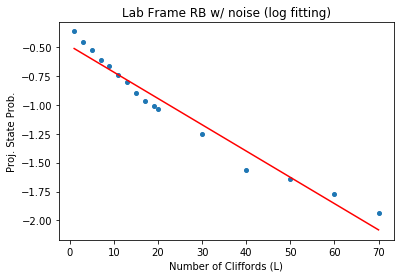

In [8]:
with open('1.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

y = data[1]
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
print("F_Ciff = 1 - r = ", 1 - popt[1])
print("A = ", popt[0])

plt.plot(L, y, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ switching noise")
plt.show()

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

y_fit = [p - 0.25 for p in y]
print(y)
print(y_fit)
y_fit = np.log(np.absolute(y_fit))
L = L[0:16]
y_fit = y_fit[0:16]
popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
r = 3/4 * (1 - np.exp(popt[1]))
print("F_Ciff = 1 - r = ", 1 - r)
print("A = ", np.exp(popt[0]))

plt.plot(L, y_fit, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=np.log(0.75))
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ noise (log fitting)")
plt.show()

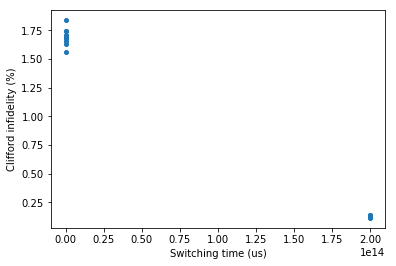

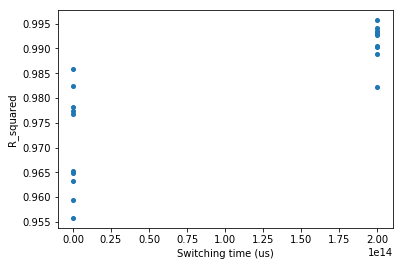

In [9]:
###############
# SRB with fixed B

# def func(x, A, r):
#     return  A * (1 - 4/3*r)**x + 0.25

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

F_Clifford = np.zeros(len(switch_list))
r_sqrd = np.zeros(len(switch_list))

for i in range(len(switch_list)):
    with open(str(i) + '.pkl', 'rb') as f:
        data = pickle.load(f)
    f.close()
    
    noise_index = data[0]
    y = data[1]
    
    ###############
    # SRB with fixed B
#     popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
#     F_Clifford[i] = popt[1] * 100
    
    ###############
    # Fixed constant term with logarithm
    y_fit = [p - 0.25 for p in y]
    y_fit = np.log(np.absolute(y_fit))
    L = L[0:16]
    y_fit = y_fit[0:16]
    popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
    F_Clifford[i] = 3/4 * (1 - np.exp(popt[1]))
    residuals = y_fit - func(L, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
    r_sqrd[i] = 1 - (ss_res/ss_tot)
    
ff = open("F_Clifford 2.pkl", "wb")
pickle.dump(F_Clifford, ff)
ff.close()
ff = open("r_sqrd 2.pkl", "wb")
pickle.dump(r_sqrd, ff)
ff.close()

plot1 = plt.figure(1)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, F_Clifford * 100, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("Clifford infidelity (%)")
plt.show()

plot2 = plt.figure(2)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, r_sqrd, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("R_squared")
plt.show()